In [1]:
import numpy as np #for mathematical manipulation
import pandas as pd #for database manipulation
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #better plotting library
%matplotlib inline

In [2]:
data = pd.read_csv("crime_new.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
Dc_Dist               int64
Psa                   object
Dispatch_Date_Time    object
Dispatch_Date         object
Dispatch_Time         object
Hour                  int64
Dc_Key                int64
Location_Block        object
UCR_General           float64
Text_General_Code     object
Police_Districts      float64
Month                 object
Lon                   float64
Lat                   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB


In [4]:
data.describe()

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
count,2.237605e+06,2.237605e+06,2.237605e+06,2.236942e+06,2.217675e+06,2.220256e+06,2.220256e+06
mean,1.726837e+01,1.315990e+01,2.010975e+11,1.271354e+03,1.206404e+01,-7.514992e+01,3.999201e+01
std,1.064898e+01,6.799952e+00,3.234684e+08,8.143510e+02,5.792056e+00,5.973890e-02,4.534823e-02
min,1.000000e+00,0.000000e+00,1.998121e+11,1.000000e+02,1.000000e+00,-7.527773e+01,3.986999e+01
25%,9.000000e+00,9.000000e+00,2.008151e+11,6.000000e+02,8.000000e+00,-7.518490e+01,3.995571e+01
50%,1.600000e+01,1.400000e+01,2.011060e+11,8.000000e+02,1.200000e+01,-7.515668e+01,3.999105e+01
75%,2.400000e+01,1.900000e+01,2.014021e+11,1.800000e+03,1.700000e+01,-7.511844e+01,4.002739e+01
max,9.200000e+01,2.300000e+01,2.017770e+11,2.600000e+03,2.200000e+01,-7.495750e+01,4.013790e+01


In [5]:
data.isnull().sum()

Dc_Dist                   0
Psa                       0
Dispatch_Date_Time        0
Dispatch_Date             0
Dispatch_Time             0
Hour                      0
Dc_Key                    0
Location_Block            0
UCR_General             663
Text_General_Code       663
Police_Districts      19930
Month                     0
Lon                   17349
Lat                   17349
dtype: int64

In [6]:
#So we can see that Police_Districts has missing value.
#It is a categorical value and is missing at random

In [7]:
data['Text_General_Code'].nunique()

33

In [8]:
data['Text_General_Code'].unique()

array(['Other Assaults', 'All Other Offenses', 'Weapon Violations',
       'Thefts', 'Burglary Non-Residential', 'Aggravated Assault Firearm',
       'Theft from Vehicle', 'Disorderly Conduct',
       'Vandalism/Criminal Mischief', 'Arson', 'Fraud',
       'Robbery No Firearm', 'Vagrancy/Loitering', 'Motor Vehicle Theft',
       'Recovered Stolen Motor Vehicle', 'Robbery Firearm', 'Embezzlement',
       'Rape', 'DRIVING UNDER THE INFLUENCE', 'Forgery and Counterfeiting',
       'Narcotic / Drug Law Violations', 'Burglary Residential',
       'Other Sex Offenses (Not Commercialized)', 'Liquor Law Violations',
       'Aggravated Assault No Firearm', 'Homicide - Criminal',
       'Gambling Violations', 'Prostitution and Commercialized Vice',
       'Public Drunkenness', 'Receiving Stolen Property',
       'Homicide - Gross Negligence',
       'Offenses Against Family and Children', 'Homicide - Justifiable',
       nan], dtype=object)

In [9]:
data.groupby(by='Text_General_Code').count()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Police_Districts,Month,Lon,Lat
Text_General_Code,,,,,,,,,,,,,
Aggravated Assault Firearm,27934,27934,27934,27934,27934,27934,27934,27934,27934,27638,27934,27661,27661
Aggravated Assault No Firearm,68989,68989,68989,68989,68989,68989,68989,68989,68989,68381,68989,68421,68421
All Other Offenses,437581,437581,437581,437581,437581,437581,437581,437581,437581,434335,437581,435476,435476
Arson,5684,5684,5684,5684,5684,5684,5684,5684,5684,5642,5684,5643,5643
Burglary Non-Residential,23276,23276,23276,23276,23276,23276,23276,23276,23276,23175,23276,23182,23182
Burglary Residential,94143,94143,94143,94143,94143,94143,94143,94143,94143,93975,94143,93979,93979
DRIVING UNDER THE INFLUENCE,53721,53721,53721,53721,53721,53721,53721,53721,53721,52604,53721,52750,52750
Disorderly Conduct,40137,40137,40137,40137,40137,40137,40137,40137,40137,39738,40137,39798,39798
Embezzlement,4807,4807,4807,4807,4807,4807,4807,4807,4807,4639,4807,4642,4642


In [10]:
#Creating a new dataframe where Police_District is missing
data_Predict_Y=data.loc[data['Police_Districts'].isnull()]

In [11]:
data_Predict_Y.count()
#Here we can see that Police_District is missing

Dc_Dist               19930
Psa                   19930
Dispatch_Date_Time    19930
Dispatch_Date         19930
Dispatch_Time         19930
Hour                  19930
Dc_Key                19930
Location_Block        19930
UCR_General           19921
Text_General_Code     19921
Police_Districts          0
Month                 19930
Lon                    2581
Lat                    2581
dtype: int64

In [12]:
data_X = data[data['Police_Districts'].notnull()]

In [13]:
data_X.count()

Dc_Dist               2217675
Psa                   2217675
Dispatch_Date_Time    2217675
Dispatch_Date         2217675
Dispatch_Time         2217675
Hour                  2217675
Dc_Key                2217675
Location_Block        2217675
UCR_General           2217021
Text_General_Code     2217021
Police_Districts      2217675
Month                 2217675
Lon                   2217675
Lat                   2217675
dtype: int64

In [14]:
data_X.columns

Index(['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code', 'Police_Districts', 'Month', 'Lon', 'Lat'],
      dtype='object')

In [15]:
Y_train=data_X["Police_Districts"]
list1 = ["Police_Districts","Dispatch_Date_Time","Dispatch_Date","Dispatch_Time","Lon","Lat","Month","Text_General_Code",
        "Location_Block","Psa"]
X_train = data_X.drop(list1,axis = 1)

In [16]:
data_Predict_Y=data_Predict_Y.drop(list1,axis = 1)

In [17]:
data_Predict_Y.fillna(0,inplace=True)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators=600)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, Y_train, test_size=0.30, random_state=101)

In [22]:
np.any(np.isnan(X_train_new))
np.all(np.isfinite(X_train_new))

False

In [23]:
np.any(np.isnan(y_train_new))
np.all(np.isfinite(y_train_new))

True

In [24]:
y_train_new.head()

83620       2.0
266713      1.0
1026164    18.0
2070463    15.0
1877728     1.0
Name: Police_Districts, dtype: float64

In [25]:
X_train_new.fillna(0,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [26]:
y_train_new.fillna(0,inplace=True)

In [27]:
X_test_new.fillna(0,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [ ]:
rfc.fit(X_train_new,y_train_new)

In [82]:
predictions_new = rfc.predict(X_test_new)

In [83]:
type(predictions_new)

numpy.ndarray

In [84]:
np.savetxt("ABC.csv", predictions_new, delimiter=",")

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(y_test_new,predictions_new))

             precision    recall  f1-score   support

        1.0       0.98      0.99      0.99     14404
        2.0       1.00      0.99      1.00     34993
        3.0       0.99      0.99      0.99     34613
        4.0       1.00      0.99      1.00      9284
        5.0       0.99      0.99      0.99     28948
        6.0       1.00      1.00      1.00     13216
        7.0       1.00      1.00      1.00     22058
        8.0       0.99      0.99      0.99     24952
        9.0       0.99      0.99      0.99     39621
       10.0       0.99      0.99      0.99     36191
       11.0       1.00      1.00      1.00     55039
       12.0       0.98      0.98      0.98     21474
       13.0       0.99      0.99      0.99     22453
       14.0       0.99      0.97      0.98     32950
       15.0       0.98      0.99      0.99     40826
       16.0       0.99      0.99      0.99     45668
       17.0       0.99      0.99      0.99     48490
       18.0       0.98      0.98      0.98   

In [91]:
prediction_impute = rfc.predict(data_Predict_Y)

In [92]:
np.savetxt("imputed.csv", prediction_impute, delimiter=",")

In [94]:
data_Predict_Y["Police_Districts"]=prediction_impute

In [95]:
data_Predict_Y.head()

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts
0,18,14,200918067518,800.0,14.0
1,14,0,200914033994,2600.0,10.0
2,25,15,200925083199,800.0,18.0
7,77,18,200977001770,500.0,22.0
8,35,1,200935021299,2600.0,20.0


In [97]:
data_Predict_Y.count()

Dc_Dist             19930
Hour                19930
Dc_Key              19930
UCR_General         19930
Police_Districts    19930
dtype: int64

In [98]:
data_Predict_Y_impute=data.loc[data['Police_Districts'].isnull()]

In [100]:
data_Predict_Y_impute["Police_Districts"]=prediction_impute

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
frames = [data_Predict_Y_impute,data_X]

result = pd.concat(frames)

In [103]:
result.to_csv("imputed_crimes.csv")

In [107]:
result.isnull().sum()

Dc_Dist                   0
Psa                       0
Dispatch_Date_Time        0
Dispatch_Date             0
Dispatch_Time             0
Hour                      0
Dc_Key                    0
Location_Block            0
UCR_General             663
Text_General_Code       663
Police_Districts          0
Month                     0
Lon                   17349
Lat                   17349
dtype: int64

In [87]:
data.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [88]:
count_Offence_type=data.groupby(['Text_General_Code']).size()
top10=count_Offence_type.sort_values(ascending=False).head(10)

In [117]:
top10

Text_General_Code
All Other Offenses                205465
Thefts                            125082
Other Assaults                    123269
Vandalism/Criminal Mischief        97158
Theft from Vehicle                 79497
Narcotic / Drug Law Violations     65103
Burglary Residential               49104
Fraud                              48595
Recovered Stolen Motor Vehicle     42274
Aggravated Assault No Firearm      33047
dtype: int64

<Container object of 10 artists>

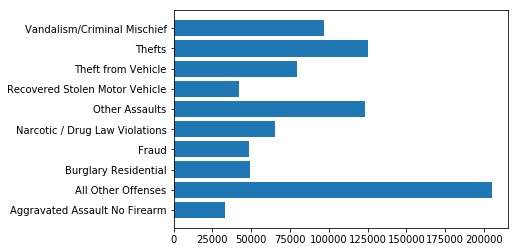

In [118]:
plt.barh(top10.index,top10.values)

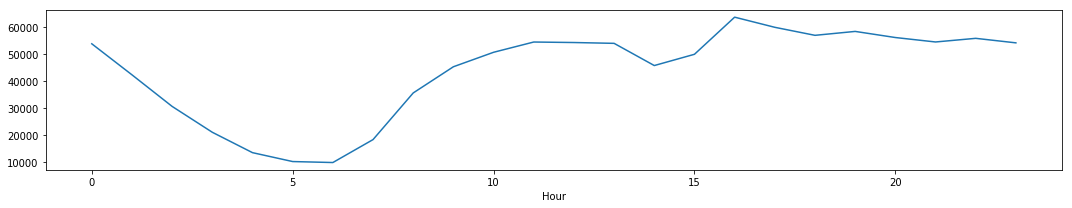

In [120]:
data.groupby('Hour').count()['Text_General_Code'].plot(figsize=(15,3))
plt.tight_layout()

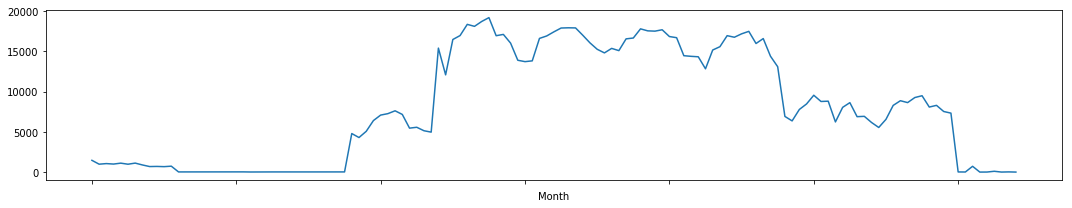

In [121]:
data.groupby('Month').count()['Text_General_Code'].plot(figsize=(15,3))
plt.tight_layout()

In [ ]:
data['timeStamp'] =data['Dispatch_Date'] + " " +data['Dispatch_Time']

In [134]:
data['timeStamp'] = data['timeStamp'].replace('.', ':',inplace=True)

In [ ]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])